# Predicting Heart Failure Based on Clinical Data

This is in partial fulfillment of the course Statistical Modeling and simulation (CSMODEL). 

Submitted by: 
- ANG, Charlene
- CAI, Mark Jayson
- SANTOS, Carlo Luis
S15

Submitted to:

Mr. Thomas James Tiam-Lee 

September 22, 2020

## Heart Failure Prediction

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### Introduction

Heart failure is a persistent and progressive cardiovascular condition where in the heart is unable to pump the right amount of oxygenated blood through out the body. Lifestyle and other prevailing conditions of a person can affect their risk of having heart failure. Every year, 31% of the total deaths aroud the world is caused by cardiovascular diseases. As knowledge about these conditions broaden through the years, there are are a lot of factors that can help predict the posibility of heart failure to occur. With the help of modern tools, survival rate of people with heart disease, early detection of heart diseases and deeper understanding of these cnditions can transpire that may be of great help for future generations to have a healthier lives.

In this notebook, the proponents aim to predict the chance of heart failure based on clinical features, and know which factors affect the occurance of heart failure. 

### Data Collection

The dataset was collected from 299 patients from the Faisalabad Institute of Cardiology and the Allied Hospital in Faisalabad from April to December 2015 by Jurman and Chicco. The researchers were able to identify the potential variables that may affect or cause heart failure. 

### Data Variables

The Heart Failure Clinical Features Dataset contains 13 variables with each observation representing a patient who have medical records of heart failure. Each row of the dataset is representing an observation while each column represents each variable. 

Each variable and its description in the dataset is the following:
* **age:** The age of the patient
* **anaemia:** Whether the patient has anemia or not (1 for has anemia, 0 for not)
* **creatinine_phosphokinase:** The amount of the CPK enzyme in the blood (measured in mcg/L)
* **diabetes:** Whether the patient has diabetes or not (1 for has diabetes, 0 for not)
* **ejection_fraction:** Percentage of blood that leaves the heart at each contraction
* **high_blood_pressure:** Whether the patient has high blood pressure or not (1 for has high blood pressure, 0 for not)
* **platelets:** Refers to the platelet count in blood (measured in kiloplatelets/mL)
* **serum_creatinine:** Level of serum creatinine in the blood (measured in mg/dL)
* **serum_sodium:** Level of serum sodium in the blood (measured in mEq/L)
* **sex:** Whether a patient is male or female (1 for male, 0 for female)
* **smoking:** Whether a patient is a smoker or not (1 for is a smoker, 0 for not)
* **time:** Number of days for the follow-up period of the patient.
* **DEATH_EVENT:** Whether the patient died during the follow-up period or still alive (1 for died, 0 for not)


## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import seaborn as sns
from functools import reduce
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from scipy.stats import ttest_ind

### Loading the Dataset 

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Data Cleaning

#### Duplicates

In [5]:
df.duplicated().sum()

0

#### Null values

In [6]:
df.isna().sum().sort_values()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Based on the values presented above, there are no categorical data, no duplication of observations and no nullvalues present in the dataset, thus, the researchers will no longer perform data cleaning

### Exploratory Data Analysis Questions

**Question#1**: What are the average values of age that are most likely to contract heart failure?

First lets look at the age distribution of the patients

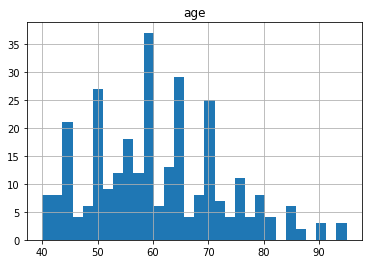

In [7]:
df.hist("age", bins=30)
plt.show()

Let's now look at the average, median, and standard deviation age of the patients.

In [8]:
df.agg({"age": ["mean", "median", "std", "count"]})

,age
mean,60.833893
median,60.000000
std,11.894809
count,299.000000


**Answer#1**: 60.83 is the average age in which patients contract a heart disease. 60 is the median age. And the standard deviation is 11.89.

**Question#2**: Is Age and Sex an indicator for Death Event?

Let's first look at the death event and the age of the patients.

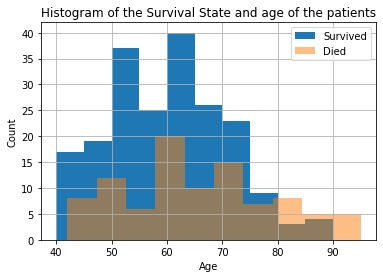

In [9]:
x = df.loc[df['DEATH_EVENT'] == 0, ['age']]
y = df.loc[df['DEATH_EVENT'] == 1, ['age']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and age of the patients')
plt.legend(loc='upper right')
plt.show()

Let's now look at the death event and the sex of the patient.

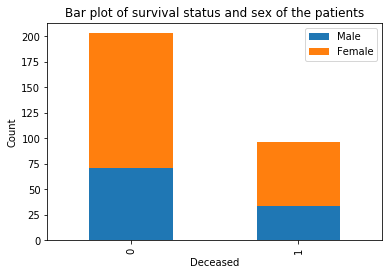

In [10]:
df.groupby(['DEATH_EVENT', 'sex']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Deceased')
plt.ylabel('Count')
plt.title('Bar plot of survival status and sex of the patients')
plt.legend(["Male", "Female"])
plt.show()

**Answer#2**: The older the patient is, the more likely that the patient will die because of heart failure. There is not enough information to conclude that sex is an indicator of death events of patients who suffered from heart failure

**Question#3**:What is the distribution of patients in the following clinical features of the dataset?

Here we are going to look at the percentage of patients who have anemia, diabetes, hypertension, and those who smoke.

#### Anaemia Percentage

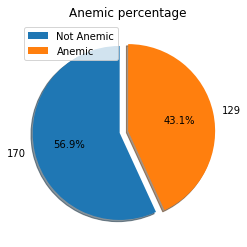

In [11]:
val = df['anaemia'].value_counts()
labels = ['Not Anemic', 'Anemic']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Anemic percentage')
plt.legend(labels)
plt.show()

#### Diabetic Percentage

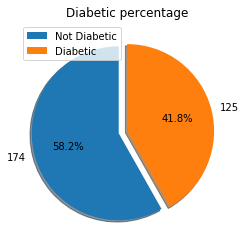

In [12]:
val = df['diabetes'].value_counts()
labels = ['Not Diabetic', 'Diabetic']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Diabetic percentage')
plt.legend(labels)
plt.show()

Hypertension Percentage

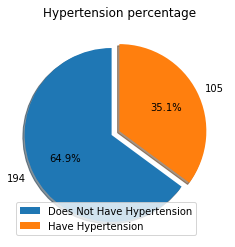

In [13]:
val = df['high_blood_pressure'].value_counts()
labels = ['Does Not Have Hypertension', 'Have Hypertension']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Hypertension percentage')
plt.legend(labels)
plt.show()

#### Smoking percentage

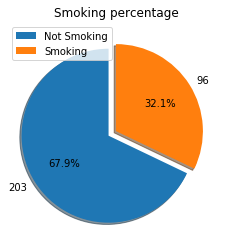

In [14]:
val = df['smoking'].value_counts()
labels = ['Not Smoking', 'Smoking']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Smoking percentage')
plt.legend(labels)
plt.show()

#### Correlation of the CPK enzyme in the blood and the survival state of the patient

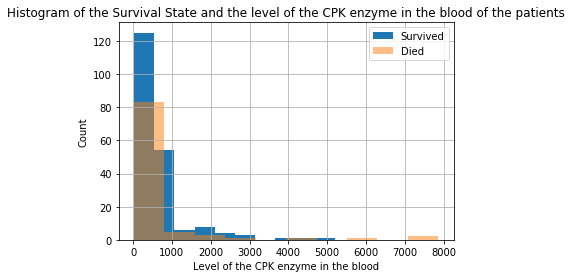

In [15]:
x = df.loc[df['DEATH_EVENT'] == 0, ['creatinine_phosphokinase']]
y = df.loc[df['DEATH_EVENT'] == 1, ['creatinine_phosphokinase']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Level of the CPK enzyme in the blood')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the level of the CPK enzyme in the blood of the patients')
plt.legend(loc='upper right')
plt.show()

Lower level of the CPK enzyme in the blood contribute to the patients' survival.

#### Correlation of the percentage of blood leaving the heart at each contraction and the survival state of the patient

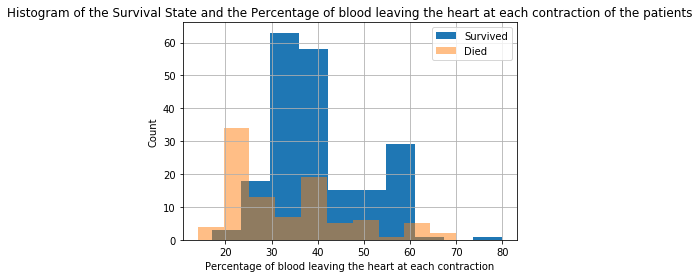

In [16]:
x = df.loc[df['DEATH_EVENT'] == 0, ['ejection_fraction']]
y = df.loc[df['DEATH_EVENT'] == 1, ['ejection_fraction']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Percentage of blood leaving the heart at each contraction')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the Percentage of blood leaving the heart at each contraction of the patients')
plt.legend(loc='upper right')
plt.show()

Higher ejection fraction contribute to the patients' survival.

#### Correlation of the platelets in the blood and the survival state of the patient

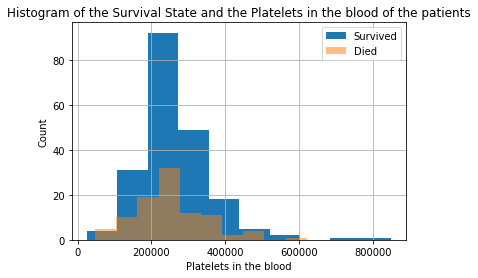

In [17]:
x = df.loc[df['DEATH_EVENT'] == 0, ['platelets']]
y = df.loc[df['DEATH_EVENT'] == 1, ['platelets']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Platelets in the blood')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the Platelets in the blood of the patients')
plt.legend(loc='upper right')
plt.show()

The amount of platelets in the blood does not really contribute to the patients' survival.

#### Correlation of the level of serum creatinine and the survival state of the patient

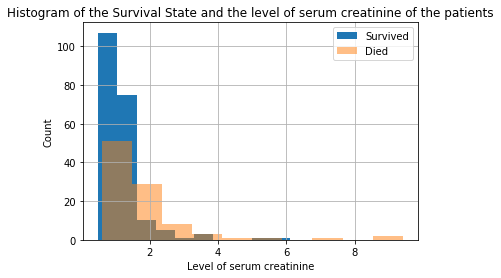

In [18]:
x = df.loc[df['DEATH_EVENT'] == 0, ['serum_creatinine']]
y = df.loc[df['DEATH_EVENT'] == 1, ['serum_creatinine']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Level of serum creatinine')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the level of serum creatinine of the patients')
plt.legend(loc='upper right')
plt.show()

Lower levels of serum creatinine contribute to the patients' survival.

#### Correlation of the level of serum sodium in the blood and the survival state of the patient

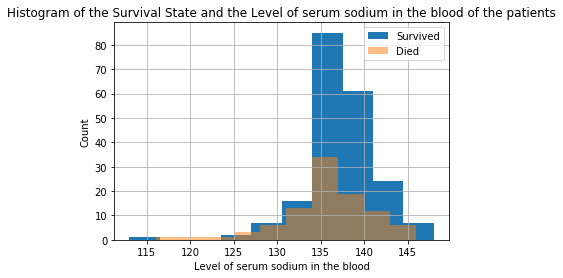

In [19]:
x = df.loc[df['DEATH_EVENT'] == 0, ['serum_sodium']]
y = df.loc[df['DEATH_EVENT'] == 1, ['serum_sodium']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Level of serum sodium in the blood')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and the Level of serum sodium in the blood of the patients')
plt.legend(loc='upper right')
plt.show()

Here we can see that higher levels of serum sodium in the blood contribute to the patients' survival.

#### Heatmap of all the variables in the dataset

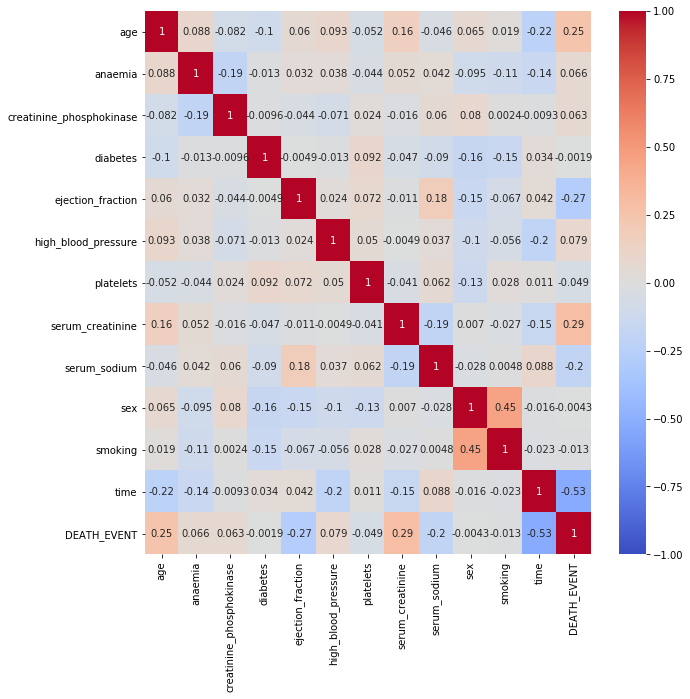

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

Using the heatmap we are able to see the correlation between each of the variables in the dataset, based on the color bar at the side of the graph, we are able to see that the closer the color is to the top of the gradient, the variables are more positively correlated, while on the other side of the gradient, closer to blue, the more negatively correlated the variables are.

We can observe here in the heatmap that in the death event row of the map, that the age is positively correlated with the death event, meaning higher the age of the patient the more likely they won't survive, which makes sense. Other variables that are noticable on the heatmap that we could gather insights from are the ejection fraction which is negatively correlated amd the serum creatinine level which is positively correlated with the death event. This falls in line with the original purpose of the dataset which is predicting the heart failure of the patient based on these two factors.

## Research Questions

**Research Question #1** :Given the level of age, time, serum sodium, serum creatinine, and ejection fraction, what is the chance of heart failure?


This research question is significant because it is the main purpose of the dataset. Being able to find out the chance of heart failure based on the correlated variables such as age, time, serum sodium, serum creatinine, and ejection fraction, will significantly help out the medical field.

Due to the correlation analysis from the previous parts, the proponents have chosen the following variables as the prediction variables for heart failure: age, time, serum sodium, serum creatinine, and ejection fraction.

In [21]:
variables = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
x = variables
y = df['DEATH_EVENT']

###### Train Test Split

The Train Test Split is done to effectively separate the training data from the actual evaluation data that will be used for verifying the effectivity of the model performance

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

###### Support Vector Classification
Support Vector Classification (SVC) was used as a marchine learning algorithm because of its efficiency when the dataset is relatively small. SVC draws a line between the dataset to separate the classification between two states which is indicating whether given the variables of age, ejection_fraction, serim_creatinine, serum_sodium, and time, that heart failure might occur.

In [23]:
from sklearn.svm import SVC
svc = SVC(random_state=0, kernel = 'rbf')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
y_pred = svc.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [25]:
con_matrix = confusion_matrix(y_test, y_pred)
svm_accuracy = accuracy_score(y_test, y_pred)
print(svm_accuracy)

0.9


This shows a 90% accuracy on predicting whether heart failure will occur to the data observation given the varialbes of age, ejection_fraction, serim_creatinine, serum_sodium, and time. The result is significant because it can give a warning to people whether they are in risk of a heart failure or not.

**Research Question #2** : Find the confidence interval of the level of serum creatinine and ejection fraction for those who are alive and deceased

According to the authors of the dataset, heart failure can be predicted from the level of serum creatinine and ejection fraction, therefore the proponents decided to see what the level of serum creatinine and ejection fraction would result into heart failure by finding out the confidence interval for those who are alive and those who died of heart failure.

##### Confidence Interval of Serum Creatinine for those who are Alive

In [26]:
alive_df = df.loc[df['DEATH_EVENT'] == 0]
dead_df = df.loc[df['DEATH_EVENT'] == 1]

z_star_95 = norm.ppf(0.975)
n = 40
alive_df = alive_df.sample(n)
alive_agg_serum = alive_df.agg({"serum_creatinine": ["mean", "median", "std"]})
alive_agg_serum

,serum_creatinine
mean,1.298000
median,1.100000
std,0.789311


In [27]:
sample_mean_alive_serum = alive_agg_serum.loc["mean"][0]
sample_median_alive_serum = alive_agg_serum.loc["median"][0]
sample_std_alive_serum = alive_agg_serum.loc["std"][0]
moe_alive_serum = z_star_95 * (sample_std_alive_serum / np.sqrt(n))
print(sample_mean_alive_serum - moe_alive_serum, sample_mean_alive_serum + moe_alive_serum)

1.0533945940485034 1.5426054059514962


The average level of serum creatinine in the blood for those survived from heart failure with a 95% confidence is 1.0533 to 1.5426. 

##### Confidence Interval of Serum Creatinine for those who are Deceased

In [28]:
dead_df = dead_df.sample(n)
dead_agg_serum = dead_df.agg({"serum_creatinine": ["mean", "median", "std"]})
dead_agg_serum

,serum_creatinine
mean,1.987250
median,1.450000
std,1.633623


In [29]:
sample_mean_dead_serum = dead_agg_serum.loc["mean"][0]
sample_median_dead_serum = dead_agg_serum.loc["median"][0]
sample_std_dead_serum = dead_agg_serum.loc["std"][0]
moe_dead_serum = z_star_95 * (sample_std_dead_serum / np.sqrt(n))
print(sample_mean_dead_serum - moe_dead_serum, sample_mean_dead_serum + moe_dead_serum)

1.4809943936708267 2.4935056063291734


The average level of serum creatinine in the blood for those who passed away from heart failure with a 95% confidence is 1.4809 to 2.4935. 

##### Confidence Interval of Ejection Fraction for those who are Alive

In [30]:
alive_df = alive_df.sample(n)
alive_agg_eject = alive_df.agg({"ejection_fraction": ["mean", "median", "std"]})
alive_agg_eject

,ejection_fraction
mean,41.675000
median,40.000000
std,11.241835


In [31]:
sample_mean_alive_eject = alive_agg_eject.loc["mean"][0]
sample_median_alive_eject = alive_agg_eject.loc["median"][0]
sample_std_alive_eject = alive_agg_eject.loc["std"][0]
moe_alive_eject = z_star_95 * (sample_std_alive_eject / np.sqrt(n))
print(sample_mean_alive_eject - moe_alive_eject, sample_mean_alive_eject + moe_alive_eject)

38.19118336695644 45.15881663304356


The average percentage of blood leaving the heart at each contraction or the ejection fraction for those survive from heart failure with a 95% confidence is 38.1911 to 45.1588. 

##### Confidence Interval of Ejection Fraction for those who are Deceased

In [32]:
dead_df = dead_df.sample(n)
dead_agg_eject = dead_df.agg({"ejection_fraction": ["mean", "median", "std"]})
dead_agg_eject

,ejection_fraction
mean,35.250000
median,35.000000
std,12.715325


In [33]:
sample_mean_dead_eject = dead_agg_eject.loc["mean"][0]
sample_median_dead_eject = dead_agg_eject.loc["median"][0]
sample_std_dead_eject = dead_agg_eject.loc["std"][0]
moe_dead_eject = z_star_95 * (sample_std_dead_eject / np.sqrt(n))
moe_dead_eject
print(sample_mean_dead_eject - moe_dead_eject, sample_mean_dead_eject + moe_dead_eject)

31.309552398042378 39.19044760195762


The average percentage of blood leaving the heart at each contraction or the ejection fraction for those who passed away from heart failure with a 95% confidence is 31.3095 to 39.1904. 

## Insights and Conclusion

The proponents of the notebook has found that features: age, time(follow up period), serum sodium, serum creatinine, and ejection fraction are the features that has the greatest effect with the occurence of heart failure. With this findings, the proponents have used these features and created a model that can predict whether there is a chance of heart failure to occur with a 90% accuracy result. This means that if these features are in a certain critical level, or value, heart failure may incur. 

The proponents has also found that serum creatinine and ejection fraction are 2 features that are critical for human survival. The proponents found that patients who did not die from heart failure have serum creatinine levels from 1.0533 to 1.5426 mg/dL and ejection fraction of 38.1911 to 45.1588% with 95% confidence level. Furthermore, for patients who have passed away due to heart failure have serum creatinine levels of 1.4809 to 2.4935 mg/dL, and ejection fraction  of 31.3095 to 39.1904% with 95% confidence interval. Compared to the normal level of serum creatine of 0.84 to 1.21 mg/dL the levels of both the patients who survived and passed away are significantly higher than the normal level. For the normal ejection fraction, the heart should pump 50-70% of blood out of the heart but based on the results, both the hearts of the people who survied and passed away pumped remarkably lower percentage of blood out of their heart. This means that their blood is not circulating enough oxygenated blood throughout the body affecting their other organs such as the kidneys which in based on their serum creatinine levels are not functioning well. 

Finding out the results of the research questions provides future work regarding this dataset or similar ones. One future work that the proponents suggest is solidifying the ranges of in risk of heart failure due to a high serum creatinine or the percentage of ejection fraction. Another is using the dataset and model to create an application that can be a medical app that can check out whether you are in risk of heart failure with the given clinical features. This work would largely benefit the general population and can also help the medical field create more accurate models and be able to convince the people more.

Data models like these can be beneficial for the field of medicine where healthcare practitioners to see different factors in which the patients incur heart failure. It may also open doors for further research and cure development for the future.

These information are valuable not only for the field of medicine but also for the general public for reliable and accessible information. It is important for the general public to be more informed with these findings for them to ensure their personal safety and for them to mantain their general health.

## References 

World Health Organization.(n.d.). World heart day. Retrieved from https://www.who.int/cardiovascular_diseases/world-heart-day/en/ . Retrieved September 18, 2020

Heart Foundation. (n.d.). What is Heart Failure?. Retrieved from https://www.heartfoundation.org.au/conditions/heart-failure. Retrieved September 18, 2020